# Re-run Europar experiments for PhD manuscript

To study a new behavior "degrad_temp".
This notebook is a diary of what I did.

In [4]:
import pandas as pd
from matplotlib import pyplot as plt

## Mon 30 Oct 23
- Updated software to latest versions (simgrid, batsim, batmen)
- Updated the way `batmen` is called with new CLI
- Renamed `renonce`->`renounce` and `degrad`->`degrad_space` in scripts, inputs and outputs (below, script to rename folders)

In [2]:
for xp in range(105):
    for window in [1, 4]:
        old = f"out/expe{xp}/dm_user_degrad_window{window}"
        new = f"out/expe{xp}/dm_user_degrad_space_window{window}"
        ! mv {old} {new} 

## Tue 31 Oct 23
- Launched on my PC expe0 with `rigid` and `degrad_temp`, to test the adapted launch script
- Moved all output of campaign2 to a folder `out/campaign2` to keep track
- Launched on my PC expe1 with `rigid` and `degrad_temp`, to compare `rigid` with the run from Europar and see if the output have changed

/home/mael/.local/lib/python3.10/site-packages/evalys/metrics.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  event_df = start_event_df.append(
/home/mael/git/demand-response-user/scripts/util.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(expe_file + '_viz.png')
/home/mael/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


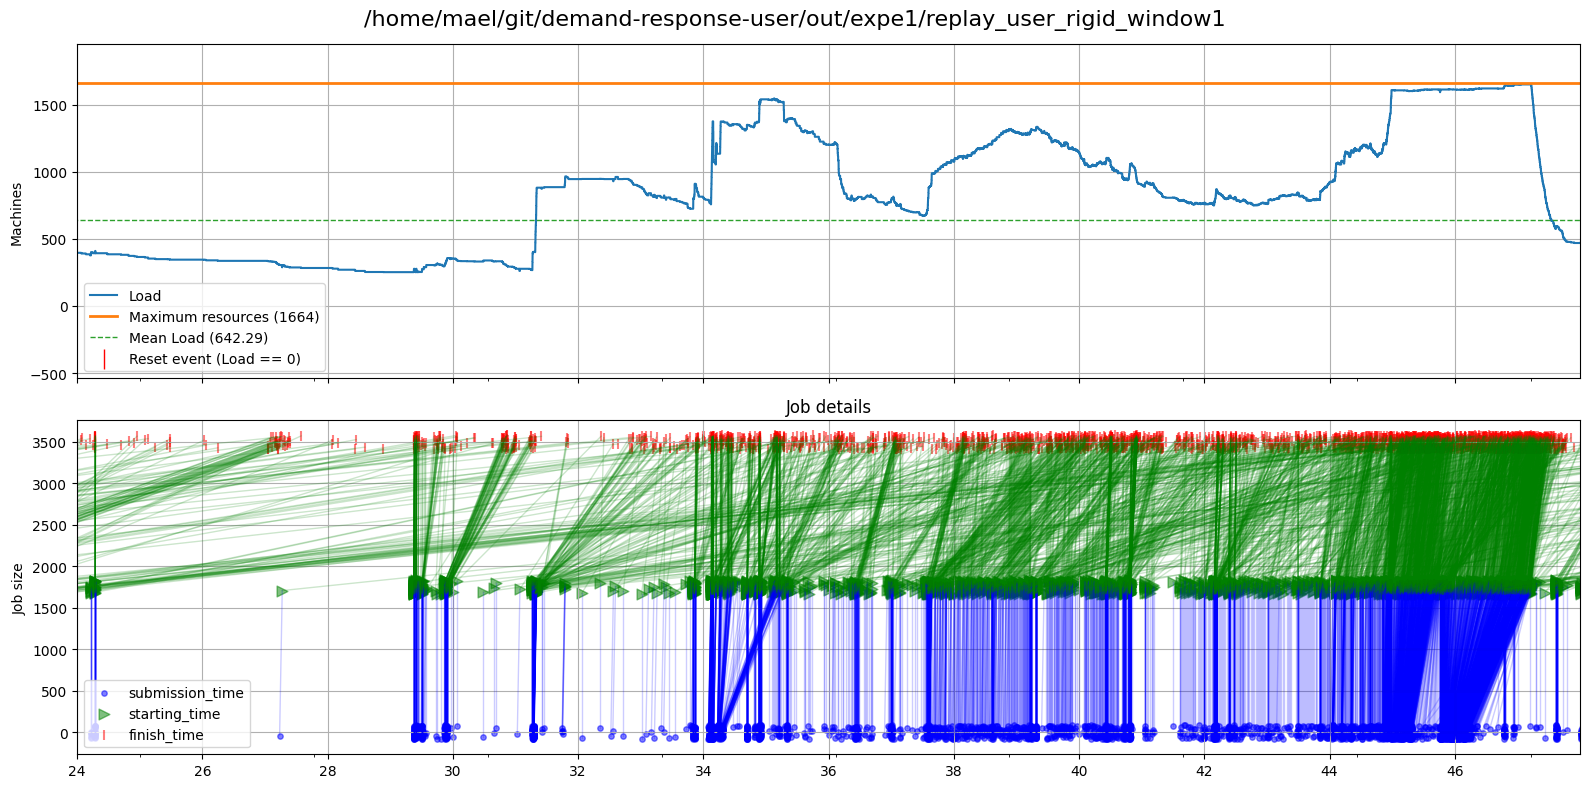

In [2]:
# Visualize results
from scripts.util import * 

new_xp = "/home/mael/git/demand-response-user/out/expe1/replay_user_rigid_window1"

plot_load_and_details(new_xp)

/home/mael/.local/lib/python3.10/site-packages/evalys/metrics.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  event_df = start_event_df.append(
/home/mael/git/demand-response-user/scripts/util.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(expe_file + '_viz.png')
/home/mael/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


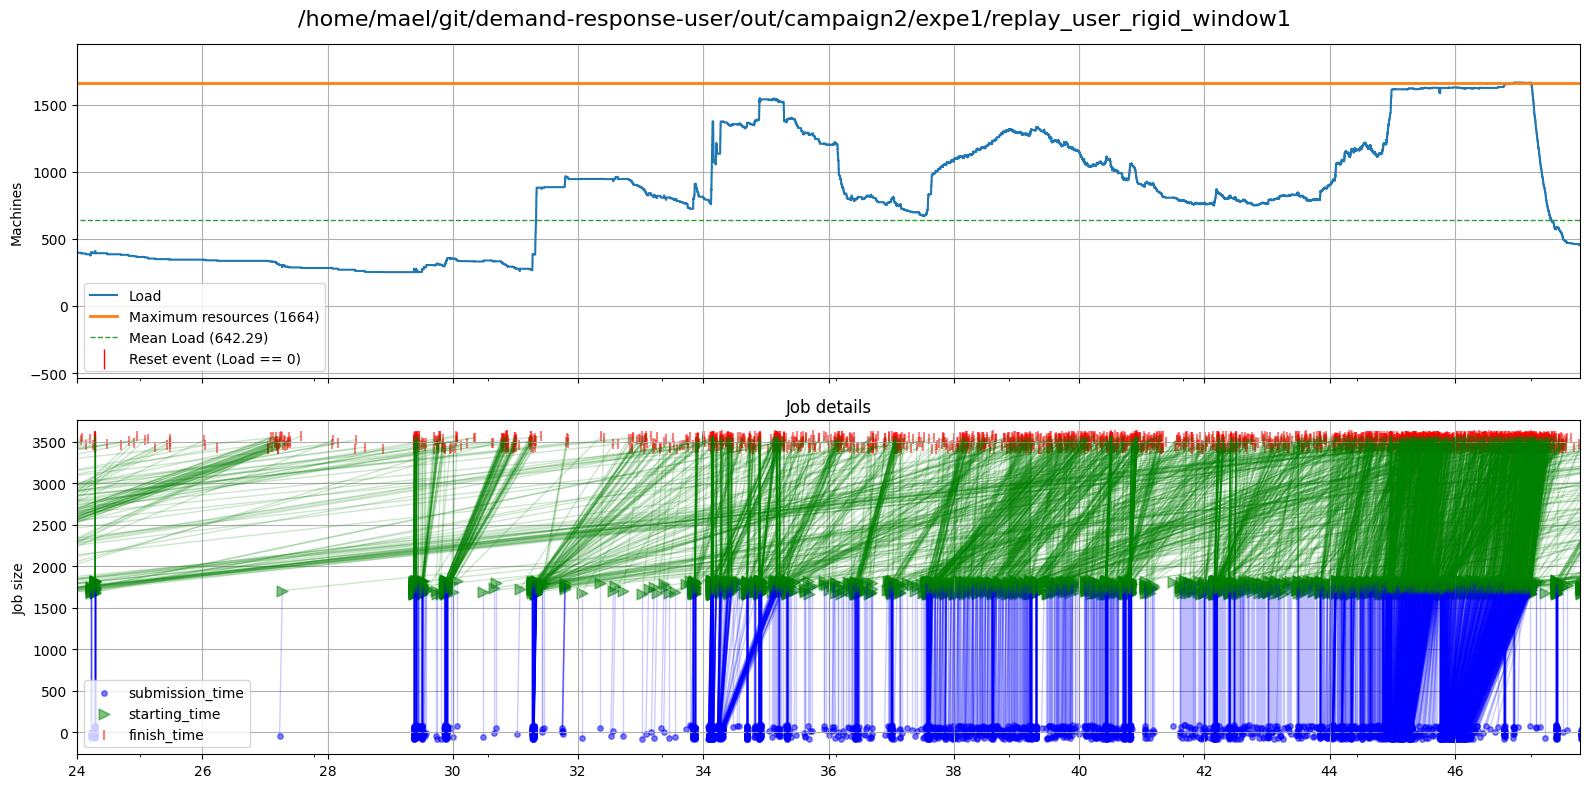

In [3]:
old_xp = "/home/mael/git/demand-response-user/out/campaign2/expe1/replay_user_rigid_window1"

plot_load_and_details(old_xp)

/home/mael/.local/lib/python3.10/site-packages/evalys/metrics.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  event_df = start_event_df.append(
/home/mael/git/demand-response-user/scripts/util.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(expe_file + '_viz.png')
/home/mael/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


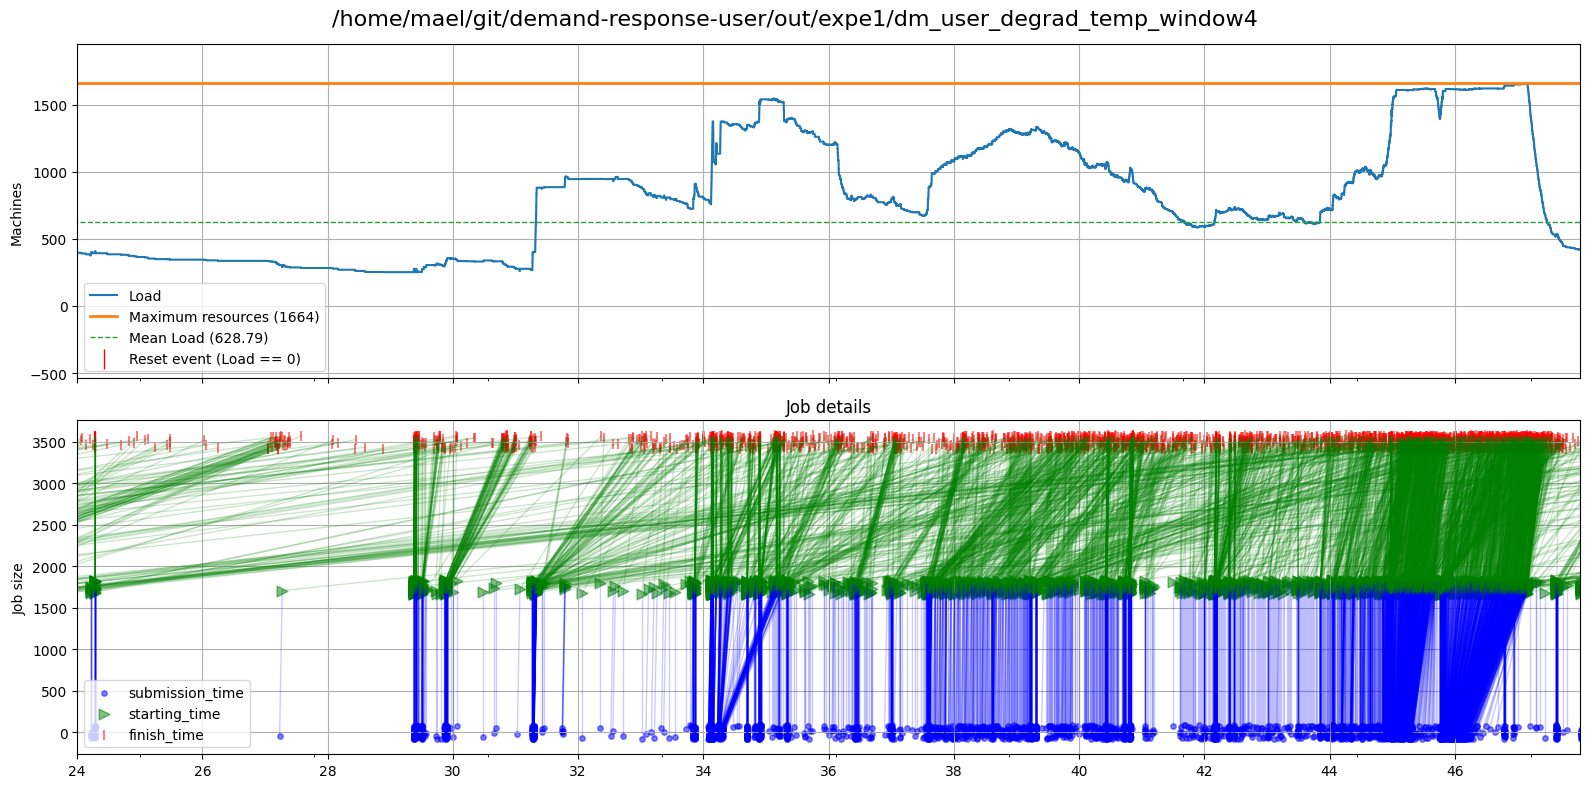

In [32]:
deg_temp_xp = "/home/mael/git/demand-response-user/out/expe1/dm_user_degrad_temp_window4"
plot_load_and_details(deg_temp_xp)

By looking at the evalys output, they look the same. 
Unfortunately the `_jobs.csv` are not exactly equal:

In [20]:
new_df = pd.read_csv(f"{new_xp}/_jobs.csv", index_col="job_id").sort_index()
old_df = pd.read_csv(f"{old_xp}/_jobs.csv", index_col="job_id").sort_index()
print("Same profile?", new_df.profile.equals(old_df.profile) )
print("Same sub_time?", new_df.submission_time.equals(old_df.submission_time) )
print("Same final_state?", new_df.final_state.equals(old_df.final_state) )
print("Same starting_time?", new_df.starting_time.equals(old_df.starting_time) )

Same profile? True
Same sub_time? True
Same final_state? True
Same starting_time? False


How big is the difference? Let's check the scheduling outputs:

In [30]:
new_simu_res = pd.read_csv(f"{new_xp}/_schedule.csv", index_col="batsim_version")
old_simu_res = pd.read_csv(f"{old_xp}/_schedule.csv", index_col="batsim_version")
comp_res = pd.concat([old_simu_res, new_simu_res])
display(comp_res)
print("Change between old and new, in %:")
display(comp_res.pct_change()*100)

consumed_joules  makespan  max_slowdown  max_turnaround_time  \
batsim_version                                                                 
4.1.0              3.336375e+09  318796.0         823.4              86419.0   
4.2.0              3.316097e+09  318796.0         861.9              86379.0   

                max_waiting_time  mean_slowdown  mean_turnaround_time  \
batsim_version                                                          
4.1.0                     8420.0       7.773299           4704.296167   
4.2.0                     8616.0       7.788404           4704.070914   

                mean_waiting_time  nb_computing_machines  nb_grouped_switches  \
batsim_version                                                                  
4.1.0                  790.800640                    104                 1189   
4.2.0                  790.575387                    104                 1199   

                ...  nb_machine_switches  scheduling_time  simulation_time  \
batsim_version  ...                                                          
4.1.0           ...                 1295        15.626369        88.279348   
4.2.0           ...                 1305         3.784860        15.149731   

                success_rate  time_computing  time_idle  time_sleeping  \
batsim_version                                                           
4.1.0                    1.0    1.667744e+07   0.000033   1.106698e+07   
4.2.0                    1.0    1.645177e+07   0.000034   1.118572e+07   

                time_switching_off  time_switching_on  time_unavailable  
batsim_version                                                           
4.1.0                       4194.0            89400.0               0.0  
4.2.0                       4224.0            90150.0               0.0  

[2 rows x 25 columns]

Change between old and new, in %:


consumed_joules  makespan  max_slowdown  max_turnaround_time  \
batsim_version                                                                 
4.1.0                       NaN       NaN           NaN                  NaN   
4.2.0                 -0.607765       0.0      4.675735            -0.046286   

                max_waiting_time  mean_slowdown  mean_turnaround_time  \
batsim_version                                                          
4.1.0                        NaN            NaN                   NaN   
4.2.0                   2.327791       0.194319             -0.004788   

                mean_waiting_time  nb_computing_machines  nb_grouped_switches  \
batsim_version                                                                  
4.1.0                         NaN                    NaN                  NaN   
4.2.0                   -0.028484                    0.0             0.841043   

                ...  nb_machine_switches  scheduling_time  simulation_time  \
batsim_version  ...                                                          
4.1.0           ...                  NaN              NaN              NaN   
4.2.0           ...             0.772201       -75.779018       -82.838873   

                success_rate  time_computing  time_idle  time_sleeping  \
batsim_version                                                           
4.1.0                    NaN             NaN        NaN            NaN   
4.2.0                    0.0       -1.353128   3.030303       1.072903   

                time_switching_off  time_switching_on  time_unavailable  
batsim_version                                                           
4.1.0                          NaN                NaN               NaN  
4.2.0                     0.715308           0.838926               NaN  

[2 rows x 25 columns]

## Tue 14 Nov 23
- rerun all expe campaign on g5k (grisou@nancy): took 1 hour 29 minutes
- transfer XP results to `out/extension_europar`

Text(0.5, 0.98, '% diff old/new')

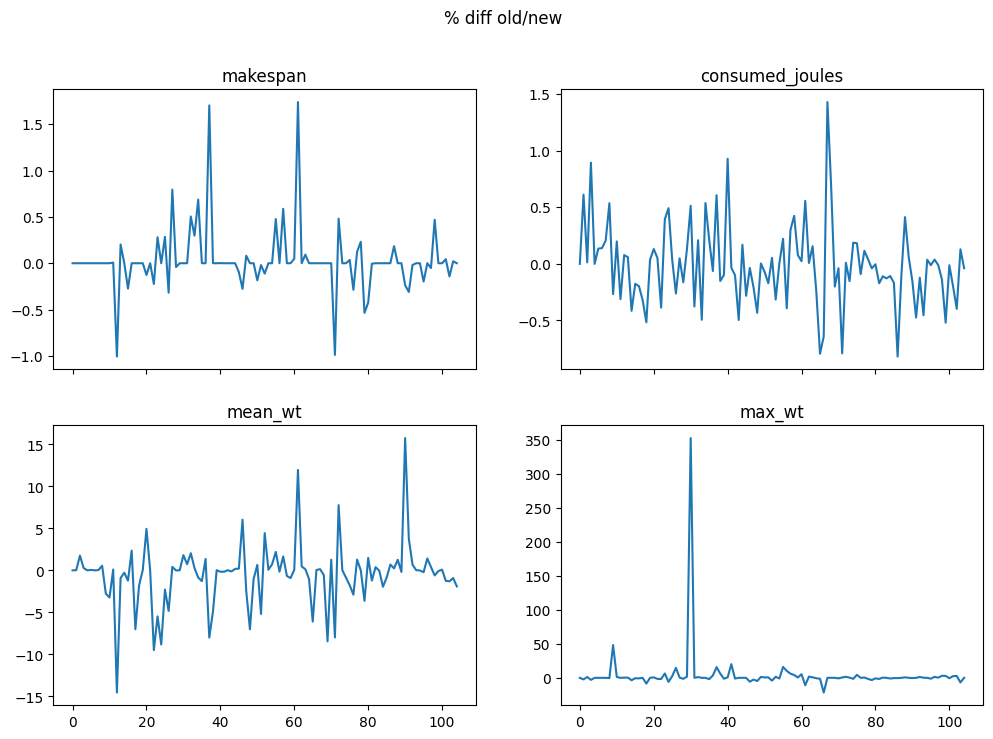

In [25]:
nb_exp = 105
makespans, m_wt, M_wt, consumed_joules = [], [], [], []

def diff_prc(old, new):
    return (new / old - 1) * 100
for xp in range(nb_exp):
    new_simu_res = pd.read_csv(f"out/extension_europar/expe{xp}/replay_user_rigid_window1/_schedule.csv")
    old_simu_res = pd.read_csv(f"out/campaign2/expe{xp}/replay_user_rigid_window1/_schedule.csv")

    makespans.append(diff_prc(new_simu_res["makespan"], old_simu_res["makespan"]))
    m_wt.append(diff_prc(new_simu_res["mean_waiting_time"], old_simu_res["mean_waiting_time"]))
    M_wt.append(diff_prc(new_simu_res["max_waiting_time"], old_simu_res["max_waiting_time"]))
    consumed_joules.append(diff_prc(new_simu_res["consumed_joules"], old_simu_res["consumed_joules"]))

fig, ax = plt.subplots(2, 2, sharex=True, figsize=[12,8])
ax[0,0].plot(makespans); ax[0,0].set_title("makespan")
ax[0,1].plot(consumed_joules); ax[0,1].set_title("consumed_joules")
ax[1,0].plot(m_wt); ax[1,0].set_title("mean_wt")
ax[1,1].plot(M_wt); ax[1,1].set_title("max_wt")
fig.suptitle("% diff old/new")

- re-run the notebook `analyse_campaign.ipynb`